In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
sleep = pd.read_csv('../data/fsleep.csv')
display(sleep.nunique())
sleep.head()
day_lbl = 'summary_date'
datetime_lbl = 'datetime'
sleep[datetime_lbl] = pd.to_datetime(sleep[day_lbl], format='%Y-%m-%d')
sleep.set_index(datetime_lbl, inplace=True)
sleep.index.min()

Unnamed: 0                     71
awake                          54
bedtime_end                    71
bedtime_end_delta              70
bedtime_start                  71
bedtime_start_delta            71
breath_average                 11
deep                           65
duration                       54
efficiency                     18
hr_5min                        71
hr_average                     67
hr_lowest                       9
hypnogram_5min                 71
is_longest                      1
light                          65
midpoint_at_delta              71
midpoint_time                  59
onset_latency                  25
period_id                       2
rem                            55
restless                       16
rmssd                          29
rmssd_5min                     71
score                          24
score_alignment                38
score_deep                      5
score_disturbances             27
score_efficiency               18
score_latency 

Timestamp('2020-03-15 00:00:00')

<AxesSubplot:xlabel='dtime'>

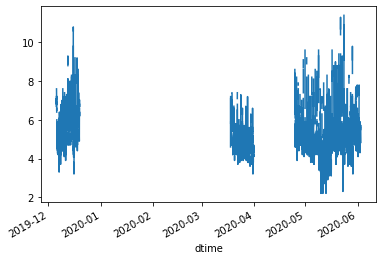

In [3]:
glucose = pd.read_csv('../data/glucose.csv')
glbl = 'Historic Glucose mmol/L'
tlbl = 'Device Timestamp'
t_ = 'dtime'
glucose['dtime']=pd.to_datetime(glucose[tlbl], format='%d-%m-%Y %H:%M')
glucose.set_index(t_, inplace=True)
glucose[glbl].plot()


In [4]:
deep_lbl = 'deep'
rem_lbl = 'rem'
total_lbl = 'total'
light_lbl = 'light'
hr_lbl = 'hr_average'
hrv_lbl = 'rmssd'
date_lbl = 'summary_date'

<AxesSubplot:xlabel='datetime'>

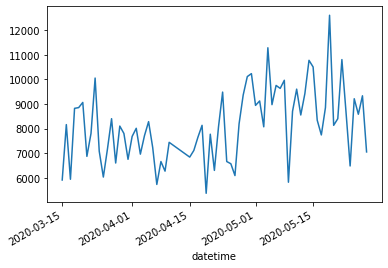

In [5]:
sleep[deep_lbl].plot()

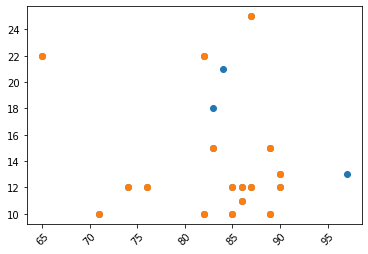

In [6]:
gki = pd.read_csv('../data/fgki.csv')

gki['dtime']=pd.to_datetime(gki['time'], format='%m/%d/%Y %H:%M:%S')
gki.set_index('dtime', inplace=True)
gki['nex'] = gki['tags'].map(lambda x: 'exercise' not in x)
df=gki[gki['nex']]

plt.scatter(gki.glucose, gki['hours since last meal'])
plt.scatter(df.glucose, df['hours since last meal'])
#plt.bar(gki.index, gki['ketones'])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

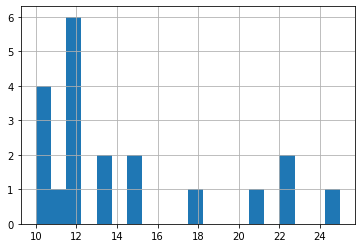

In [45]:
gki['hours since last meal'].hist(bins=20)

In [47]:
gki[glbl]=gki['glucose (mmol/L)']

In [48]:
gki.columns

Index(['Collection Timestamp', 'glucose', 'ketones', 'hct', 'hb', 'time',
       'hours since last meal', 'tags', 'comments', 'glucose (mmol/L)', 'gki',
       'nex', 'Historic Glucose mmol/L'],
      dtype='object')

<AxesSubplot:xlabel='dtime'>

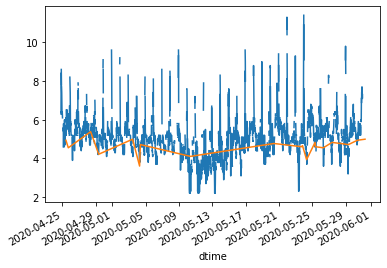

In [54]:
glucose = pd.read_csv('../data/glucose.csv')
glbl = 'Historic Glucose mmol/L'
tlbl = 'Device Timestamp'
t_ = 'dtime'
glucose['dtime']=pd.to_datetime(glucose[tlbl], format='%d-%m-%Y %H:%M')
glucose.set_index(t_, inplace=True)
glucose[glbl].plot()

f = glucose.loc['2020-04-15':'2020-05-30'][glbl].plot()
gki[glbl].plot()

In [56]:
gki['ismorn'] = gki['tags'].map(lambda x: 'morning' in x)
morn=gki[gki['ismorn']]


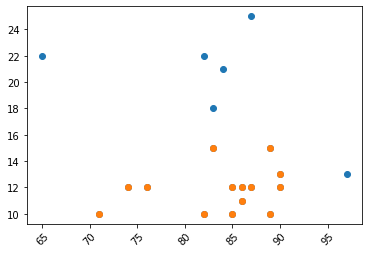

In [57]:
gki = pd.read_csv('../data/fgki.csv')

gki['dtime']=pd.to_datetime(gki['time'], format='%m/%d/%Y %H:%M:%S')
gki.set_index('dtime', inplace=True)
gki['nex'] = gki['tags'].map(lambda x: 'exercise' not in x)
df=gki[gki['nex']]

plt.scatter(gki.glucose, gki['hours since last meal'])
plt.scatter(morn.glucose, morn['hours since last meal'])
#plt.bar(gki.index, gki['ketones'])
plt.xticks(rotation=45)
plt.show()

In [134]:
gwgki = glucose.loc[glucose.ds.isin(morn.ds)].set_index(['ds'])
swgki = sleep.loc[sleep.ds.isin(morn.ds)].set_index(['ds'])
morn.set_index('ds', inplace=True)

In [26]:
def normalize(ddd):
    return (ddd-ddd.mean())/ddd.std()

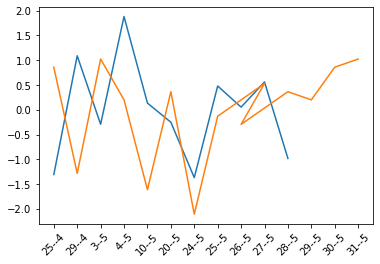

In [136]:

plt.plot(normalize(swgki[deep_lbl]))

plt.plot(normalize(morn[glbl]))
plt.xticks(rotation=45)
plt.show()

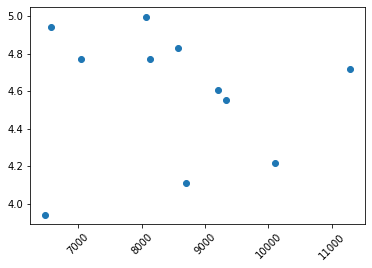

In [140]:
plt.scatter(swgki[deep_lbl], morn.loc[morn.index.isin(swgki.index)][glbl])
plt.xticks(rotation=45)
plt.show()

In [139]:
len(morn.loc[morn.index.isin(swgki.index)])

11

In [89]:
morn['ds']=morn.index.map(lambda x:'{}--{}'.format(x.day, x.month))
glucose['ds']=glucose.index.map(lambda x:'{}--{}'.format(x.day, x.month))
sleep['ds']=sleep.index.map(lambda x:'{}--{}'.format(x.day, x.month))

In [90]:
sleep.ds

datetime
2020-03-15    15--3
2020-03-16    16--3
2020-03-17    17--3
2020-03-18    18--3
2020-03-19    19--3
              ...  
2020-05-24    24--5
2020-05-25    25--5
2020-05-26    26--5
2020-05-27    27--5
2020-05-28    28--5
Name: ds, Length: 71, dtype: object

In [143]:

daygki = glucose.groupby(['ds']).mean()

In [155]:
glucose.index.isin(morn['datetime'])

AttributeError: 'DataFrame' object has no attribute 'ds'

In [156]:
morn

Index(['Collection Timestamp', 'glucose', 'ketones', 'hct', 'hb', 'time',
       'hours since last meal', 'tags', 'comments', 'glucose (mmol/L)', 'gki',
       'nex', 'Historic Glucose mmol/L', 'ismorn', 'D'],
      dtype='object')

<AxesSubplot:xlabel='ds'>

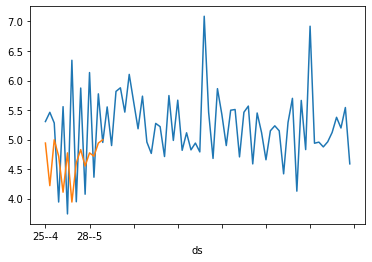

In [146]:
daygki[glbl].plot()
morn[glbl].plot()

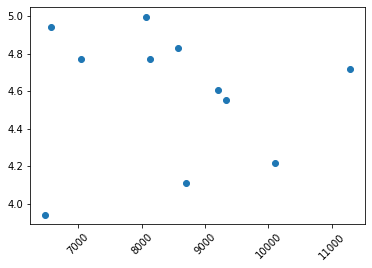

In [147]:
plt.scatter(swgki[deep_lbl], morn.loc[morn.index.isin(swgki.index)][glbl])
plt.xticks(rotation=45)
plt.show()

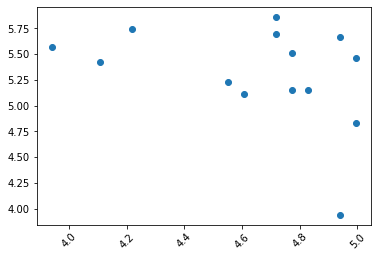

In [150]:
plt.scatter(morn[glbl], daygki.loc[daygki.index.isin(morn.index)][glbl])
plt.xticks(rotation=45)
plt.show()

In [181]:
plt.scatter(swgki[bedtime_start][deep_lbl], daygki.loc[daygki.index.isin(swgki.index)][glbl])
plt.xticks(rotation=45)
plt.show()

NameError: name 'bedtime_start' is not defined

In [215]:
sleep['DT']=sleep.index.date
glucose['DT']=glucose.index.date

In [273]:
sleep.columns

Index(['Unnamed: 0', 'awake', 'bedtime_end', 'bedtime_end_delta',
       'bedtime_start', 'bedtime_start_delta', 'breath_average', 'deep',
       'duration', 'efficiency', 'hr_5min', 'hr_average', 'hr_lowest',
       'hypnogram_5min', 'is_longest', 'light', 'midpoint_at_delta',
       'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless',
       'rmssd', 'rmssd_5min', 'score', 'score_alignment', 'score_deep',
       'score_disturbances', 'score_efficiency', 'score_latency', 'score_rem',
       'score_total', 'summary_date', 'temperature_delta',
       'temperature_deviation', 'temperature_trend_deviation', 'timezone',
       'total', 'ds', 'DT'],
      dtype='object')

In [278]:
pd.to_datetime(sleep['bedtime_start'], format='%Y-%m-%d').dt.hour

AttributeError: Can only use .dt accessor with datetimelike values

In [268]:
sleep.columns

Index(['Unnamed: 0', 'awake', 'bedtime_end', 'bedtime_end_delta',
       'bedtime_start', 'bedtime_start_delta', 'breath_average', 'deep',
       'duration', 'efficiency', 'hr_5min', 'hr_average', 'hr_lowest',
       'hypnogram_5min', 'is_longest', 'light', 'midpoint_at_delta',
       'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless',
       'rmssd', 'rmssd_5min', 'score', 'score_alignment', 'score_deep',
       'score_disturbances', 'score_efficiency', 'score_latency', 'score_rem',
       'score_total', 'summary_date', 'temperature_delta',
       'temperature_deviation', 'temperature_trend_deviation', 'timezone',
       'total', 'ds', 'DT'],
      dtype='object')

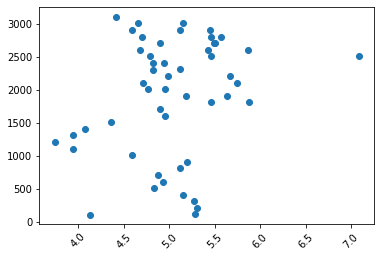

In [291]:
met='strt'
sleep['strt']=pd.to_datetime(sleep['bedtime_end'], format='%Y-%m-%d')
sleep['strt']=sleep['strt'].map(lambda x: x.day*100+(x.hour))
DTgl = glucose.set_index(['DT'])
AA=DTgl.groupby('DT')[glbl].mean()
BB = sleep.loc[sleep.index.isin(AA.index)][met]
AABB = AA.loc[AA.index.isin(BB.index.date)]
plt.scatter(AABB, BB)
plt.xticks(rotation=45)
plt.show()

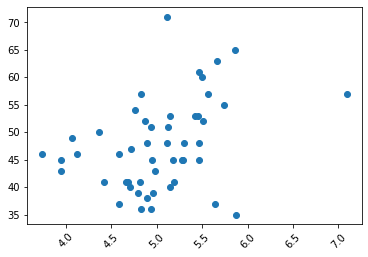

In [260]:
met=hrv_lbl
DTgl = glucose.set_index(['DT'])
AA=DTgl.groupby('DT')[glbl].mean()
BB = sleep.loc[sleep.index.isin(AA.index)][met]
AABB = AA.loc[AA.index.isin(BB.index.date)]
plt.scatter(AABB, BB)
plt.xticks(rotation=45)
plt.show()

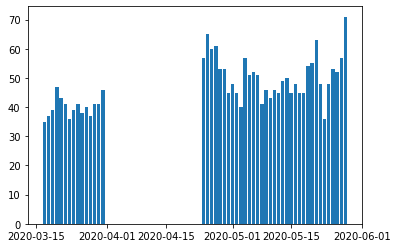

<BarContainer object of 50 artists>

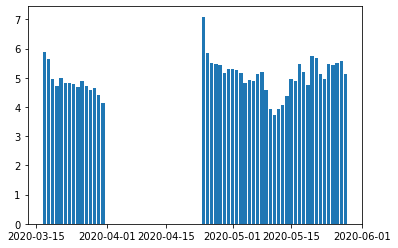

In [266]:
plt.bar(BB.index, BB)
plt.show()
plt.bar(AABB.index, AABB)

In [249]:
AA.index.isin(BB.index.date)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False])

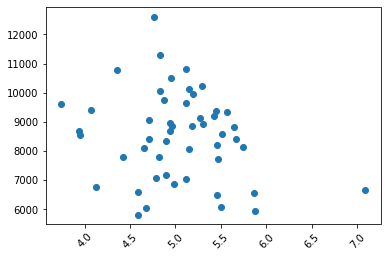

In [229]:
G.index

Index([2019-12-05, 2019-12-06, 2019-12-07, 2019-12-08, 2019-12-09, 2019-12-10,
       2019-12-11, 2019-12-12, 2019-12-13, 2019-12-14, 2019-12-15, 2019-12-16,
       2019-12-17, 2019-12-18, 2019-12-19, 2020-03-17, 2020-03-18, 2020-03-19,
       2020-03-20, 2020-03-21, 2020-03-22, 2020-03-23, 2020-03-24, 2020-03-25,
       2020-03-26, 2020-03-27, 2020-03-28, 2020-03-29, 2020-03-30, 2020-03-31,
       2020-04-24, 2020-04-25, 2020-04-26, 2020-04-27, 2020-04-28, 2020-04-29,
       2020-04-30, 2020-05-01, 2020-05-02, 2020-05-03, 2020-05-04, 2020-05-05,
       2020-05-06, 2020-05-07, 2020-05-08, 2020-05-09, 2020-05-10, 2020-05-11,
       2020-05-12, 2020-05-13, 2020-05-14, 2020-05-15, 2020-05-16, 2020-05-17,
       2020-05-18, 2020-05-19, 2020-05-20, 2020-05-21, 2020-05-22, 2020-05-23,
       2020-05-24, 2020-05-25, 2020-05-26, 2020-05-27, 2020-05-28, 2020-05-29,
       2020-05-30, 2020-05-31, 2020-06-01, 2020-06-02],
      dtype='object', name='DT')

In [157]:
morn['dtime']=pd.to_datetime(morn['time'], format='%m/%d/%Y %H:%M:%S')

In [163]:
from datetime import timedelta as TD

In [178]:
morn.dtime

ds
25--4   2020-04-25 10:45:00
29--4   2020-04-29 09:00:00
3--5    2020-05-03 10:30:00
4--5    2020-05-04 08:50:00
10--5   2020-05-10 08:49:00
20--5   2020-05-20 09:11:00
24--5   2020-05-24 07:02:00
25--5   2020-05-25 08:40:00
27--5   2020-05-27 08:00:00
26--5   2020-05-26 07:05:00
28--5   2020-05-28 09:07:00
29--5   2020-05-29 07:27:00
30--5   2020-05-30 08:56:00
31--5   2020-05-31 07:10:00
Name: dtime, dtype: datetime64[ns]

In [171]:
TD(minutes=5)

datetime.timedelta(seconds=300)

# weight

In [13]:
tr = pd.read_csv('../data/ftrck.csv')
tr['dtime']=pd.to_datetime(tr['DAY'], format='%m/%d/%Y')
tr.set_index('dtime', inplace=True)

In [62]:
tr.index.min()

Timestamp('2020-03-15 00:00:00')

In [20]:
wlbl= 'WEIGHT (kg)'
tr.columns

Index(['DAY', 'WEIGHT (kg)', 'BREAK FAST TIME', 'BREAK WATER-FAST TIME',
       'LATEST MEAL TIME', 'WORK', 'SLEEP SUBJECTIVE',
       'PRODUCTIVITY (SUBJECTIVE)', 'energy level subjective', 'TAGS'],
      dtype='object')

In [16]:
sleep.index.max()

Timestamp('2020-05-28 00:00:00')

In [37]:
from datetime import timedelta as TD

In [46]:
sdl = pd.read_csv('../data/fsleep.csv')
day_lbl = 'summary_date'
datetime_lbl = 'datetime'
sdl[datetime_lbl] = pd.to_datetime(sdl[day_lbl], format='%Y-%m-%d')-TD(days=1)
sdl.set_index([datetime_lbl], inplace=True)

In [47]:
sdl

,Unnamed: 0,awake,bedtime_end,bedtime_end_delta,bedtime_start,bedtime_start_delta,breath_average,deep,duration,efficiency,...,score_efficiency,score_latency,score_rem,score_total,summary_date,temperature_delta,temperature_deviation,temperature_trend_deviation,timezone,total
datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,4710,2020-03-16T08:49:59+01:00,31799,2020-03-16T01:46:59+01:00,6419,14.375,5910,25380,81,...,76,70,25,59,2020-03-15,-0.17,-0.17,0.00,60,20670
2020-03-15,1,6210,2020-03-17T09:34:33+01:00,34473,2020-03-17T00:31:33+01:00,1893,14.000,8160,32580,81,...,74,70,66,82,2020-03-16,-0.10,-0.10,-0.03,60,26370
2020-03-16,2,5640,2020-03-18T09:41:33+01:00,34893,2020-03-18T00:58:33+01:00,3513,13.750,5940,31380,82,...,76,70,26,80,2020-03-17,0.02,0.02,0.00,60,25740
2020-03-17,3,4170,2020-03-19T09:25:33+01:00,33933,2020-03-19T00:42:33+01:00,2553,13.750,8820,31380,87,...,88,89,36,86,2020-03-18,0.02,0.02,0.06,60,27210
2020-03-18,4,5280,2020-03-20T08:42:30+01:00,31350,2020-03-20T00:12:30+01:00,750,14.000,8850,30600,83,...,79,67,22,78,2020-03-19,-0.08,-0.08,0.04,60,25320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-23,66,5340,2020-05-25T09:43:24+02:00,35004,2020-05-25T01:27:24+02:00,5244,14.500,6480,29760,82,...,76,97,24,74,2020-05-24,0.02,0.02,0.13,120,24420
2020-05-24,67,3600,2020-05-26T09:01:03+02:00,32463,2020-05-26T02:15:03+02:00,8103,14.250,9210,24360,85,...,83,72,13,59,2020-05-25,-0.08,-0.08,0.04,120,20760
2020-05-25,68,5100,2020-05-27T09:52:03+02:00,35523,2020-05-27T01:28:03+02:00,5283,13.875,8580,30240,83,...,79,89,34,77,2020-05-26,0.06,0.06,0.06,120,25140


In [18]:
T=tr[:'2020-05-28']

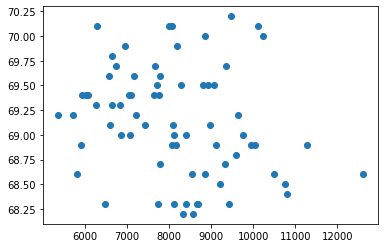

In [49]:
met=deep_lbl
dfs = sleep
wei=T[wlbl]
d_ =dfs[dfs.index.isin(T.index)][met]
w_ = wei[wei.index.isin(d_.index)]
plt.scatter(d_, w_)

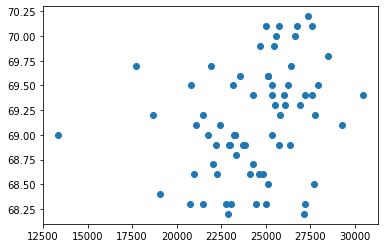

In [52]:
met=total_lbl
dfs = sdl
wei=T[wlbl]
d_ =dfs[dfs.index.isin(T.index)][met]
w_ = wei[wei.index.isin(d_.index)]
plt.scatter(d_, w_)
plt.show()

In [74]:
sdl['nd']=sdl['total']-sdl['deep']
sleep['nd']=sleep['total']-sleep['deep']

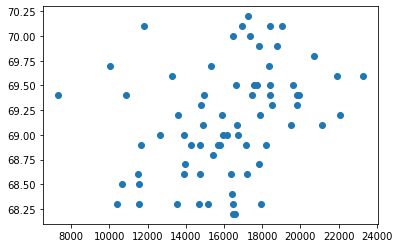

In [76]:
met='nd'

dfs = sleep
wei=T[wlbl]
d_ =dfs[dfs.index.isin(T.index)][met]
w_ = wei[wei.index.isin(d_.index)]
plt.scatter(d_, w_)
plt.show()

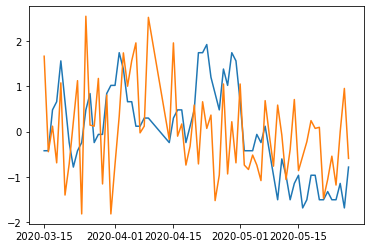

In [73]:
plt.plot(normalize(w_))
plt.plot(normalize(d_))

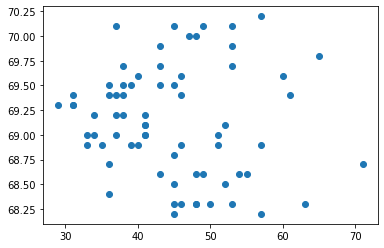

In [57]:
met=hrv_lbl
dfs = sdl
wei=T[wlbl]
d_ =dfs[dfs.index.isin(T.index)][met]
w_ = wei[wei.index.isin(d_.index)]
plt.scatter(d_, w_)
plt.show()

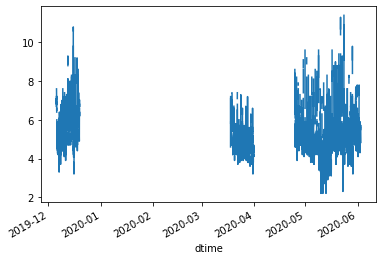

In [120]:
glucose = pd.read_csv('../data/glucose.csv')
glbl = 'Historic Glucose mmol/L'
tlbl = 'Device Timestamp'
t_ = 'dtime'
glucose['dtime']=pd.to_datetime(glucose[tlbl], format='%d-%m-%Y %H:%M')
glucose.set_index(t_, inplace=True)
glucose[glbl].plot()

glucose['day']=glucose.index.map(lambda x: x.date)
mgl = glucose.groupby('day').mean()
mdl=mgl.copy()
mdl.index = mdl.index-TD(days=1)
m2dl=mgl.copy()
m2dl.index = m2dl.index-TD(days=3)
#mdl.set_index([datetime_lbl], inplace=True)

<AxesSubplot:xlabel='day'>

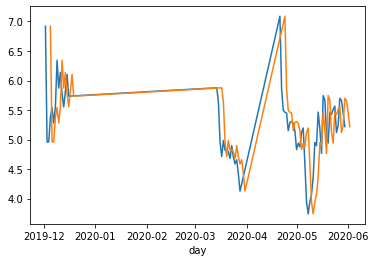

In [121]:
m2dl[glbl].plot()
mgl[glbl].plot()

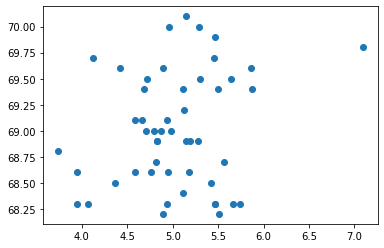

In [122]:

wei=T[wlbl]
dfs=mgl
d_=dfs[dfs.index.isin(T.index.date)][glbl]
w_ = wei[wei.index.isin(d_.index)]
plt.scatter(d_, w_)
plt.show()

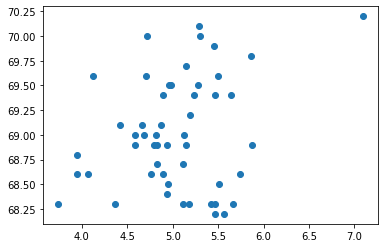

In [123]:

wei=T[wlbl]
dfs=mdl
d_=dfs[dfs.index.isin(T.index.date)][glbl]
w_ = wei[wei.index.isin(d_.index)]
plt.scatter(d_, w_)
plt.show()

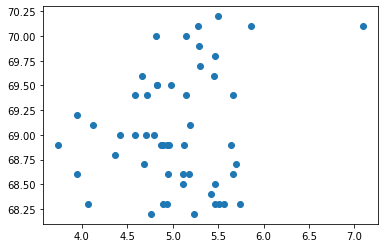

In [124]:

wei=T[wlbl]
dfs=m2dl
d_=dfs[dfs.index.isin(T.index.date)][glbl]
w_ = wei[wei.index.isin(d_.index)]
plt.scatter(d_, w_)
plt.show()

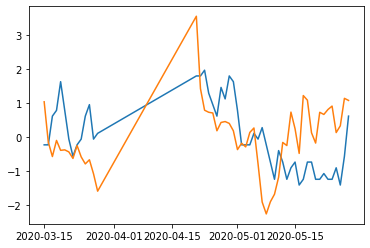

In [127]:
plt.plot( normalize(w_))
plt.plot( normalize(d_))
plt.show()

In [93]:
len(w_)

50

In [152]:
meals=pd.read_csv('../data/fmeals.csv')
meals.dropna(subset=['Time'], inplace=True)

In [153]:
meals[datetime_lbl]=pd.to_datetime(meals['Time'], format='%m/%d/%Y %H:%M:%S')
meals['D']=meals[datetime_lbl].map(lambda x:x.date())
imeals=meals.set_index(datetime_lbl)
imeals.index.min()

Timestamp('2020-04-24 18:30:00')

In [154]:
imeals

,Collection Timestamp,Time,Content,Props,Tags,weight,comments,estimated calories,estimated carb percentage,estimated fat percentage,estimated protein percentage,Unnamed: 11,Unnamed: 12,https://docs.google.com/forms/d/e/1FAIpQLSdc31VkMklTUbyj_r3WRG6ClHNnThKmWjNO3pDigdQn4xGzew/viewform,D
datetime,,,,,,,,,,,,,,,
2020-04-24 18:30:00,4/24/2020 21:24:48,4/24/2020 18:30:00,dates,High carb,"ramadan,breakfast",50.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,148.0,2020-04-24
2020-04-24 18:50:00,4/24/2020 21:24:48,4/24/2020 18:50:00,scallops\neggs\nlentils\nsalsify\ncarrot\ngarl...,Slow carb,"ramadan,breakfast",750.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,148.0,2020-04-24
2020-04-24 19:40:00,4/24/2020 21:53:41,4/24/2020 19:40:00,Coconut flour\nAlmond flour\nBrazil nut butter...,Low carb high fat,ramadan,200.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,148.0,2020-04-24
2020-04-25 18:30:00,4/25/2020 21:40:59,4/25/2020 18:30:00,dates,High carb,"ramadan,breakfast",40.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,149.0,2020-04-25
2020-04-25 18:55:00,4/25/2020 21:40:59,4/25/2020 18:55:00,sweet potato\nscallop\nsalmon\ngarlic\negg\nma...,"Slow carb, Moderate carb",ramadan,790.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,149.0,2020-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-30 11:30:00,5/30/2020 16:05:34,5/30/2020 11:30:00,Chocolate Cusco 100\nMacadamia nuts\nAlmonds\n...,Low carb high fat,breakfast,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-30
2020-05-30 03:40:00,5/30/2020 16:06:27,5/30/2020 3:40:00,Chocolate Cusco 100\nAlmond butter\nMacadamia ...,Low carb high fat,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-30
2020-05-30 16:20:00,5/30/2020 21:44:11,5/30/2020 16:20:00,Sunwarrior collagen peptides vanilla\nPulsin w...,"Low carb high fat, High protein",NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-30


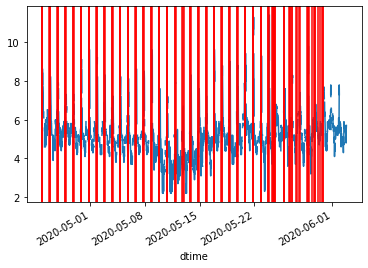

In [155]:
g= glucose.loc['2020-04-24':]
g[glbl].plot()
for x in imeals.index:
    plt.axvline(x=x, color='red')

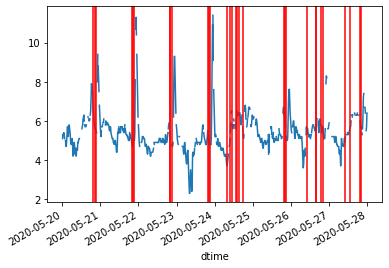

In [185]:
l = ['2020-05-{}'.format(i) for i in range(20,28)]
M=imeals[imeals.D.isin([dt.strptime(x, '%Y-%m-%d').date() for x in l])]
G=glucose[glucose.day.isin([dt.strptime(x, '%Y-%m-%d').date() for x in l])]
G[glbl].plot()
for x in M.index:
    plt.axvline(x=x, color='red')

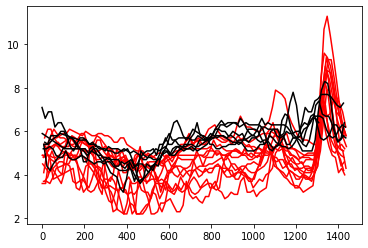

In [199]:
jl = ['2020-05-{}'.format(i) for i in range(10,23)]
for l in jl:
    l=[l]
    M=imeals[imeals.D.isin([dt.strptime(x, '%Y-%m-%d').date() for x in l])]
    G=glucose[glucose.day.isin([dt.strptime(x, '%Y-%m-%d').date() for x in l])]
    plt.plot(G.index.hour*60+G.index.minute, G[glbl], color='red')

jl = ['2020-05-{}'.format(i) for i in [24,26,27,29,30, 31]]
for l in jl:
    l=[l]
    M=imeals[imeals.D.isin([dt.strptime(x, '%Y-%m-%d').date() for x in l])]
    G=glucose[glucose.day.isin([dt.strptime(x, '%Y-%m-%d').date() for x in l])]
    plt.plot(G.index.hour*60+G.index.minute, G[glbl], color='black')


In [200]:
T.columns

Index(['DAY', 'WEIGHT (kg)', 'BREAK FAST TIME', 'BREAK WATER-FAST TIME',
       'LATEST MEAL TIME', 'WORK', 'SLEEP SUBJECTIVE',
       'PRODUCTIVITY (SUBJECTIVE)', 'energy level subjective', 'TAGS'],
      dtype='object')

In [201]:
sleep

,Unnamed: 0,awake,bedtime_end,bedtime_end_delta,bedtime_start,bedtime_start_delta,breath_average,deep,duration,efficiency,...,score_latency,score_rem,score_total,summary_date,temperature_delta,temperature_deviation,temperature_trend_deviation,timezone,total,nd
datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-15,0,4710,2020-03-16T08:49:59+01:00,31799,2020-03-16T01:46:59+01:00,6419,14.375,5910,25380,81,...,70,25,59,2020-03-15,-0.17,-0.17,0.00,60,20670,14760
2020-03-16,1,6210,2020-03-17T09:34:33+01:00,34473,2020-03-17T00:31:33+01:00,1893,14.000,8160,32580,81,...,70,66,82,2020-03-16,-0.10,-0.10,-0.03,60,26370,18210
2020-03-17,2,5640,2020-03-18T09:41:33+01:00,34893,2020-03-18T00:58:33+01:00,3513,13.750,5940,31380,82,...,70,26,80,2020-03-17,0.02,0.02,0.00,60,25740,19800
2020-03-18,3,4170,2020-03-19T09:25:33+01:00,33933,2020-03-19T00:42:33+01:00,2553,13.750,8820,31380,87,...,89,36,86,2020-03-18,0.02,0.02,0.06,60,27210,18390
2020-03-19,4,5280,2020-03-20T08:42:30+01:00,31350,2020-03-20T00:12:30+01:00,750,14.000,8850,30600,83,...,67,22,78,2020-03-19,-0.08,-0.08,0.04,60,25320,16470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-24,66,5340,2020-05-25T09:43:24+02:00,35004,2020-05-25T01:27:24+02:00,5244,14.500,6480,29760,82,...,97,24,74,2020-05-24,0.02,0.02,0.13,120,24420,17940
2020-05-25,67,3600,2020-05-26T09:01:03+02:00,32463,2020-05-26T02:15:03+02:00,8103,14.250,9210,24360,85,...,72,13,59,2020-05-25,-0.08,-0.08,0.04,120,20760,11550
2020-05-26,68,5100,2020-05-27T09:52:03+02:00,35523,2020-05-27T01:28:03+02:00,5283,13.875,8580,30240,83,...,89,34,77,2020-05-26,0.06,0.06,0.06,120,25140,16560


In [274]:
h_lbl0 = 'nHR/nRHR'
h_lbl1 = 'nHR-nRHR'
nhr_lbl = 'nHR'
nhrv_lbl = 'nHRV'
sleep[nhr_lbl]=normalize(sleep[hr_lbl])
sleep[nhrv_lbl]=normalize(sleep[hrv_lbl])
sleep[h_lbl0]=(sleep[nhr_lbl]/(sleep[nhrv_lbl]+1+abs(sleep[nhrv_lbl].min())))
sleep[h_lbl1]=(normalize(sleep[hr_lbl])-(abs(sleep[nhrv_lbl])))
sleep_gl = sleep[imeals.index.min():imeals.index.max()]

<AxesSubplot:xlabel='datetime'>

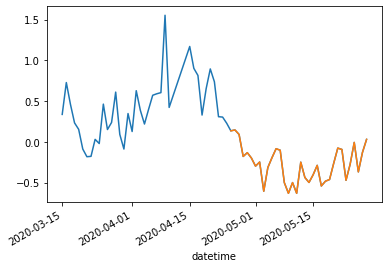

In [275]:
l=h_lbl0

sleep[l].plot()
sleep_gl[l].plot()


<AxesSubplot:xlabel='datetime'>

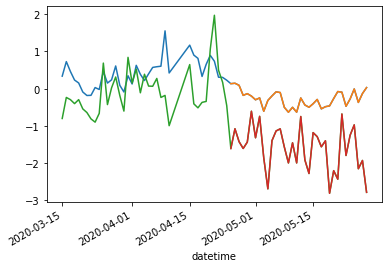

In [276]:
l=h_lbl0

sleep[l].plot()
sleep_gl[l].plot()
l=h_lbl1

sleep[l].plot()
sleep_gl[l].plot()

<AxesSubplot:xlabel='datetime'>

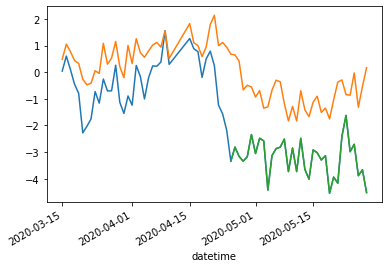

In [262]:
l=h_lbl1

sleep[l].plot()
normalize(sleep[hr_lbl]).plot()
sleep_gl[l].plot()


<AxesSubplot:>

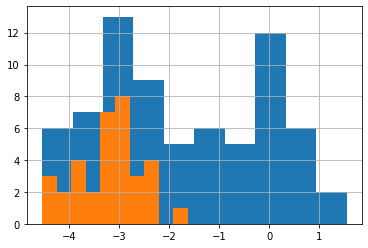

In [263]:
l=h_lbl1
sleep[l].hist()
sleep_gl[l].hist()

# stat

In [233]:
baseline = sleep[:'2020-04-23']
fasted = sleep['2020-04-24':'2020-05-23']

In [230]:
# Let's define some helper functions
def get_empirical_cdf(data):
    """Returns the x,y values for a cumulative distribution function using an empirical method
    :param data: data as a numpy array
    :return: x,y
    """
    n = len(data)
    return np.sort(data), (np.arange(1, n+1) / n)

def get_numpy_arrays(metric):
    return np.array(baseline[metric]), np.array(fasted[metric])

def get_permuted(data1, data2):
    permuted_data = np.random.permutation(np.concatenate((data1, data2)))
    return permuted_data[:len(data1)], permuted_data[len(data1):]

def permute_and_draw_replicates(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = get_permuted(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def get_means_diff(data_1, data_2):
    fm=np.mean(data_1)
    return ( fm- np.mean(data_2))/fm


In [232]:
# Helper plotting function
def resize(a=15,b=5):
    plt.figure(figsize=(a, b), dpi= 80, facecolor='w', edgecolor='k')
def compare_barplot(metric, unit):
    resize()
    _ = plt.bar(baseline.index, baseline[metric], label='Baseline {}'.format(metric))
    _ = plt.bar(fasted.index, fasted[metric], label='Fasted {}'.format(metric))
    _ = plt.xlabel('date')
    _ = plt.ylabel('{} in {}'.format(metric, unit))
    _ = plt.xticks(rotation=45)
    _ = plt.legend()
    _ = plt.title('Comparing {} (in {}) between baseline and fasted periods'.format(metric, unit))
    plt.show()



In [264]:
met = deep_lbl
unit='seconds'
b, f = np.array(sleep[h_lbl0]), np.array(sleep_gl[h_lbl1])

0.0819129099182817


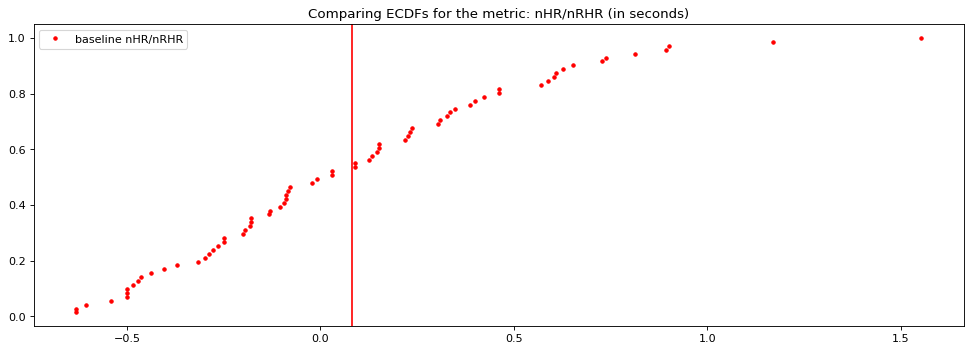

In [266]:
met=h_lbl0
b= np.array(sleep[met])
b_mean = b.mean()
x, y = get_empirical_cdf(b)
resize()
plt.plot(x, y, color='red', marker='.', linestyle='none', label='baseline {}'.format(met))
plt.axvline(x=b_mean, color='red')
plt.legend()
plt.title('Comparing ECDFs for the metric: {} (in {})'.format(met, unit))
print(b_mean)

<AxesSubplot:>

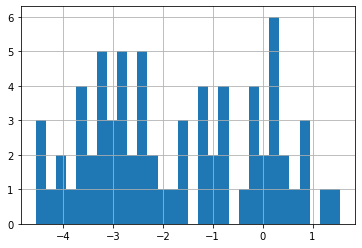

In [267]:
sleep[h_lbl1].hist(bins=30)

Text(0.5, 1.0, 'Comparing ECDFs for the metric: nHR-nRHR (in seconds)')

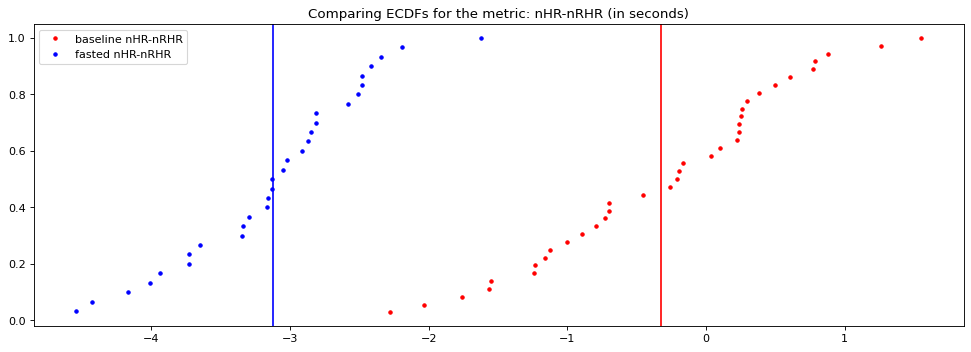

In [269]:
met = h_lbl1
unit='seconds'
b, f = get_numpy_arrays(met)
b_mean = b.mean()
f_mean = f.mean()
x, y = get_empirical_cdf(b)
resize()
plt.plot(x, y, color='red', marker='.', linestyle='none', label='baseline {}'.format(met))
plt.axvline(x=b_mean, color='red')
x, y = get_empirical_cdf(f)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasted {}'.format(met))
plt.axvline(x=f_mean, color='blue')
plt.legend()
plt.title('Comparing ECDFs for the metric: {} (in {})'.format(met, unit))

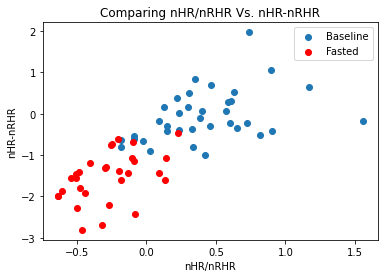

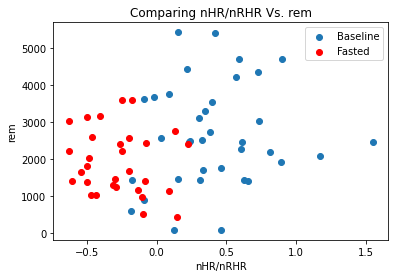

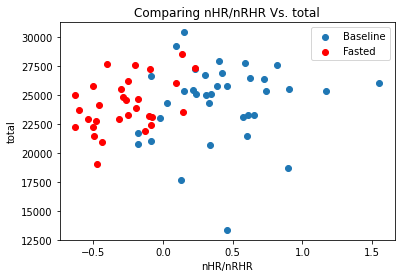

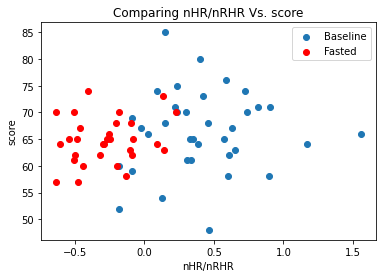

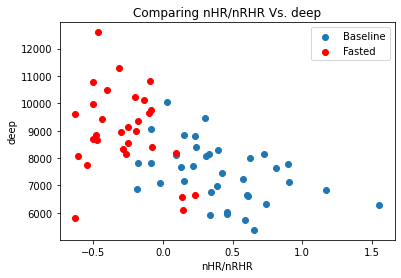

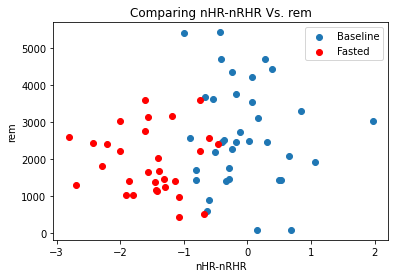

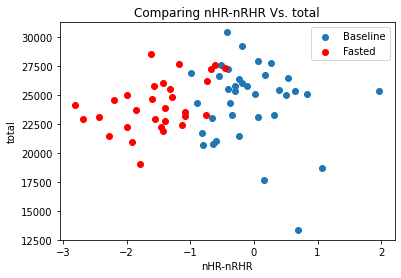

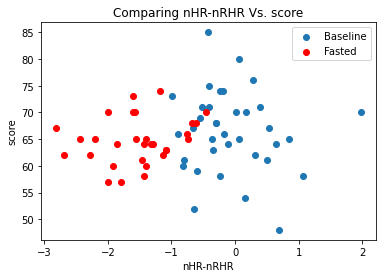

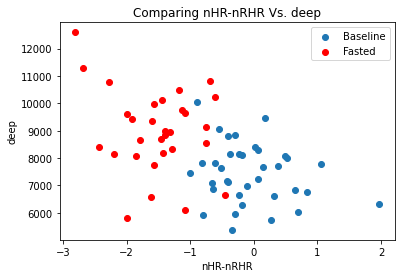

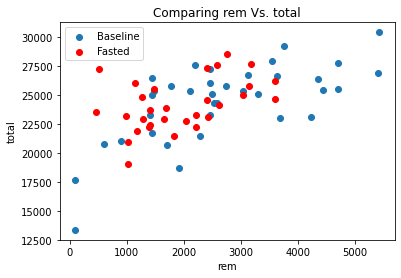

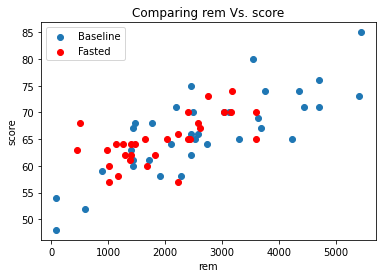

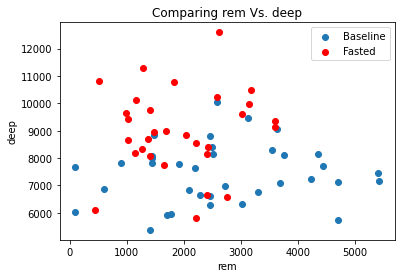

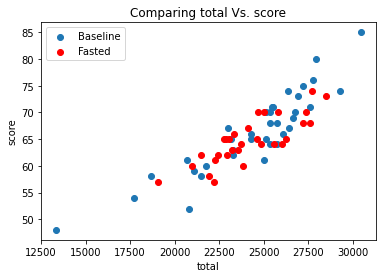

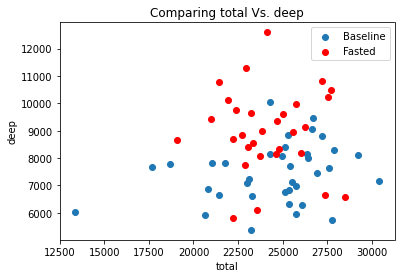

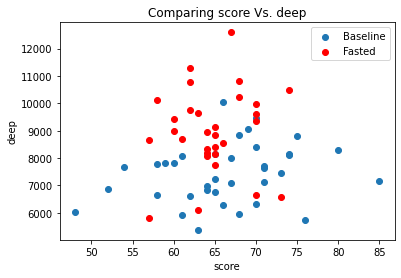

In [279]:
def scatter_compare(m1, m2):
    plt.scatter(baseline[m1], baseline[m2], label='Baseline')
    plt.scatter(fasted[m1], fasted[m2], label='Fasted', color='red')
    plt.xlabel(m1)
    plt.ylabel(m2)
    plt.title('Comparing {} Vs. {}'.format(m1, m2))
    plt.legend()
    plt.show()

comparisons = [ h_lbl0, h_lbl1, 'rem', 'total', 'score', 'deep']
for i in range(len(comparisons)-1):
    for c in comparisons[i+1:]:
        scatter_compare(comparisons[i],c)